In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:46<00:00, 22.7MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.7MB/s]


In [ ]:
%%capture
!unzip /content/dogs-vs-cats.zip -d /content/

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
os.listdir('/content/dogs_vs_cats/train/cats')

['cat.488.jpg',
 'cat.2986.jpg',
 'cat.11285.jpg',
 'cat.1602.jpg',
 'cat.9522.jpg',
 'cat.6072.jpg',
 'cat.5008.jpg',
 'cat.2753.jpg',
 'cat.4232.jpg',
 'cat.4.jpg',
 'cat.4421.jpg',
 'cat.6762.jpg',
 'cat.389.jpg',
 'cat.6433.jpg',
 'cat.7890.jpg',
 'cat.350.jpg',
 'cat.10459.jpg',
 'cat.8421.jpg',
 'cat.11875.jpg',
 'cat.2478.jpg',
 'cat.8949.jpg',
 'cat.2185.jpg',
 'cat.10367.jpg',
 'cat.1960.jpg',
 'cat.517.jpg',
 'cat.6143.jpg',
 'cat.4619.jpg',
 'cat.9512.jpg',
 'cat.5453.jpg',
 'cat.713.jpg',
 'cat.5319.jpg',
 'cat.3934.jpg',
 'cat.2479.jpg',
 'cat.9012.jpg',
 'cat.9181.jpg',
 'cat.5490.jpg',
 'cat.10639.jpg',
 'cat.7306.jpg',
 'cat.9700.jpg',
 'cat.1198.jpg',
 'cat.5368.jpg',
 'cat.9164.jpg',
 'cat.11522.jpg',
 'cat.7636.jpg',
 'cat.10116.jpg',
 'cat.5918.jpg',
 'cat.4788.jpg',
 'cat.30.jpg',
 'cat.10011.jpg',
 'cat.531.jpg',
 'cat.11819.jpg',
 'cat.2641.jpg',
 'cat.3287.jpg',
 'cat.5546.jpg',
 'cat.1606.jpg',
 'cat.10107.jpg',
 'cat.3167.jpg',
 'cat.6843.jpg',
 'cat.720.jpg',

In [ ]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
  # retrieve all images from the directory
  image_filenames = os.listdir(directory_path)

  # if there are fewer images than requested, we will show them all
  if len(image_filenames) < num_images:
    print(f"only found {len(image_filenames)} images in {directory_path}, displaying them all")
    num_images = len(image_filenames)

  # randomly select num_images number of filenames
  selected_images = random.sample(image_filenames, num_images)

  #plotting the images
  fig, axes  = plt.subplots(3,3, figsize = (8,8))
  axes = axes.ravel()

  for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"image: {class_animal}")
    axes[i].axis('off') #hides the axis

  plt.tight_layout()
  plt.show()

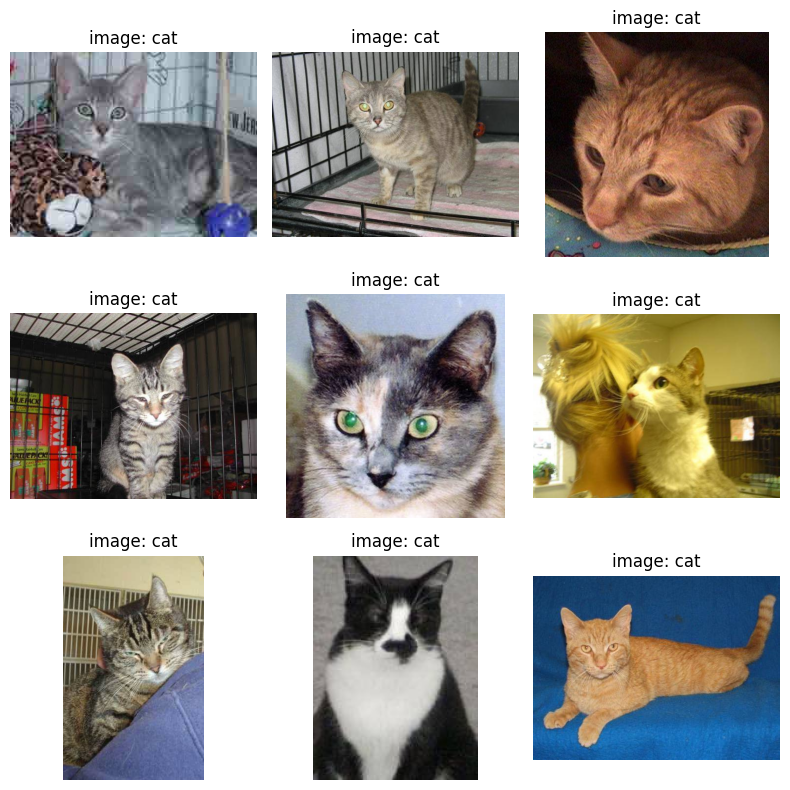

In [ ]:
#placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'
plot_images_from_directory(cat_directory_path, class_animal = 'cat')

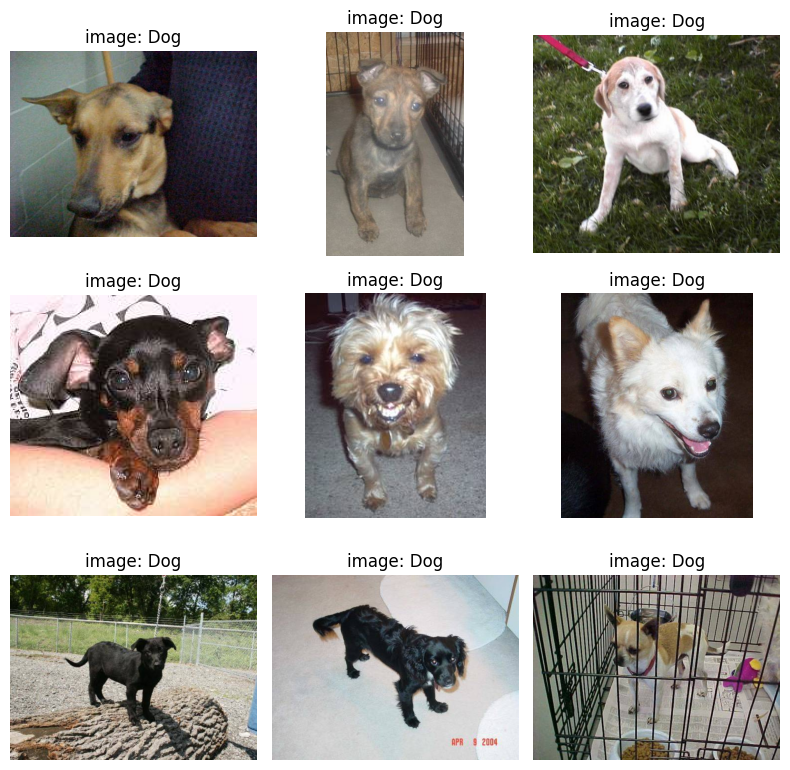

In [ ]:
#placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [ ]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


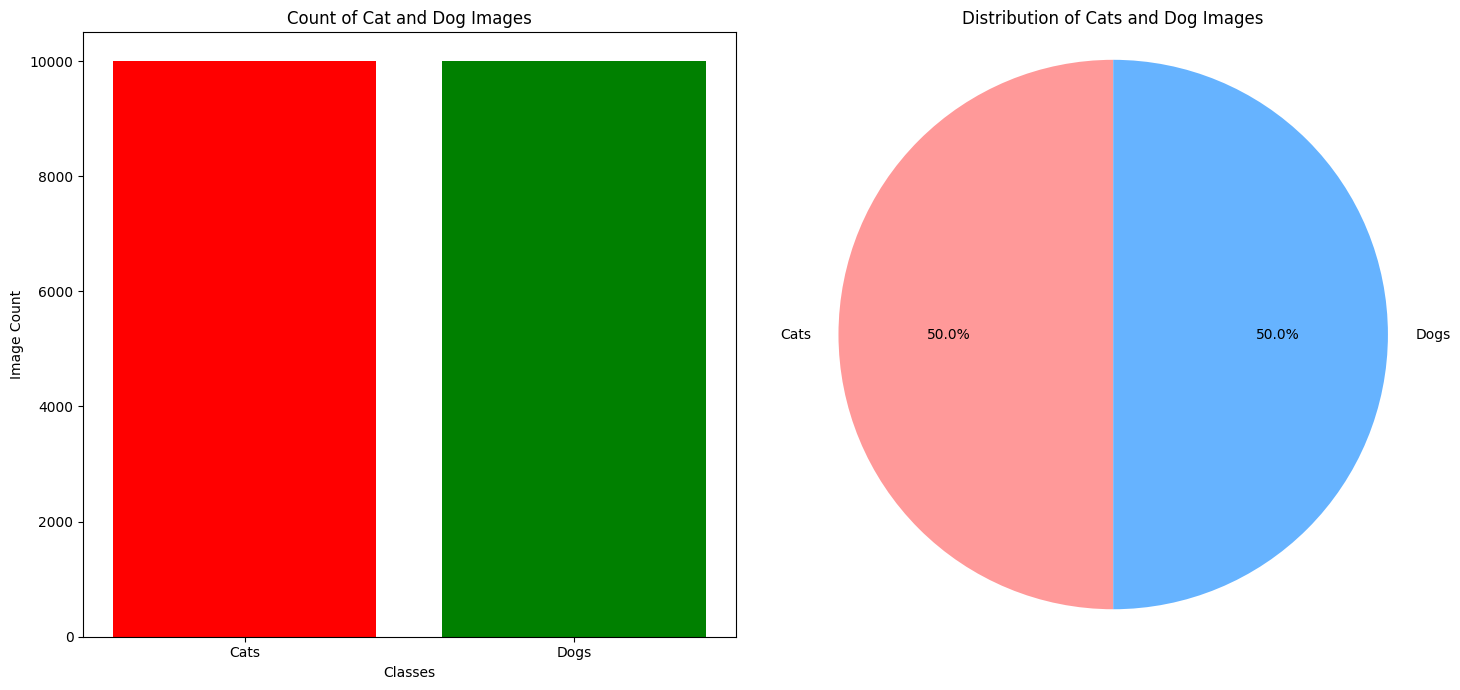

In [ ]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1,2, figsize=(15,7))

# Bar Chart
ax[0].bar(classes_animals, count, color=['red','green'])
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie Chart
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels = classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cats and Dog Images')
ax[1].axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

### Removing Corrupted Images

In [ ]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

# Loading Shapes and Channels

In [ ]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
  """
  `Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
  """

  try :
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array
  except IOError as e:
    print(f"couldnot read the image at {image_path}")
    return None


array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]], dtype=uint8)
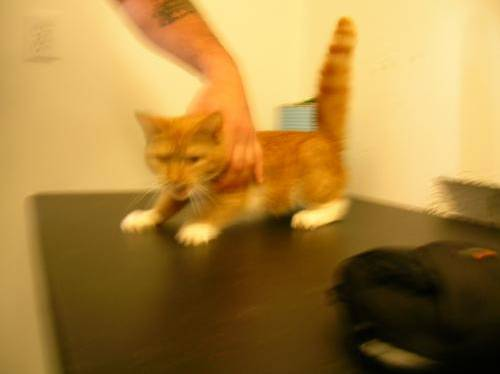

In [ ]:
image_to_array('/content/dogs_vs_cats/train/cats/cat.0.jpg')

# Using OpenCV

In [ ]:
image = '/content/dogs_vs_cats/train/cats/cat.0.jpg'

import cv2

img = cv2.imread(image)

# If the image is loaded successfully, print its pixel values
if img is not None:
  print(img)
  print(img.shape)
else:
  print("The image could not be loaded. Please check the filepath and permissions")

[[[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [122 201 240]
  [121 200 239]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [121 200 239]]

 ...

 [[ 55 122 153]
  [ 55 122 153]
  [ 55 122 153]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 54 121 152]
  [ 54 121 152]
  [ 54 121 152]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 53 120 151]
  [ 53 120 151]
  [ 53 120 151]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]
(374, 500, 3)


# Using Python

In [ ]:
import numpy as np
from PIL import Image

#loading the image with pil and converting into numpy array
img_pil = Image.open(image)
img_array = np.array(img_pil)

#print numpy array of image
print(img_array)

# print the shape of the image
print(img_array.shape)

[[[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [239 200 121]]

 ...

 [[153 122  55]
  [153 122  55]
  [153 122  55]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[152 121  54]
  [152 121  54]
  [152 121  54]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[151 120  53]
  [151 120  53]
  [151 120  53]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]]
(374, 500, 3)


# Building Model

In [ ]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Getting Classes labels

In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


# Visualising Batch Images

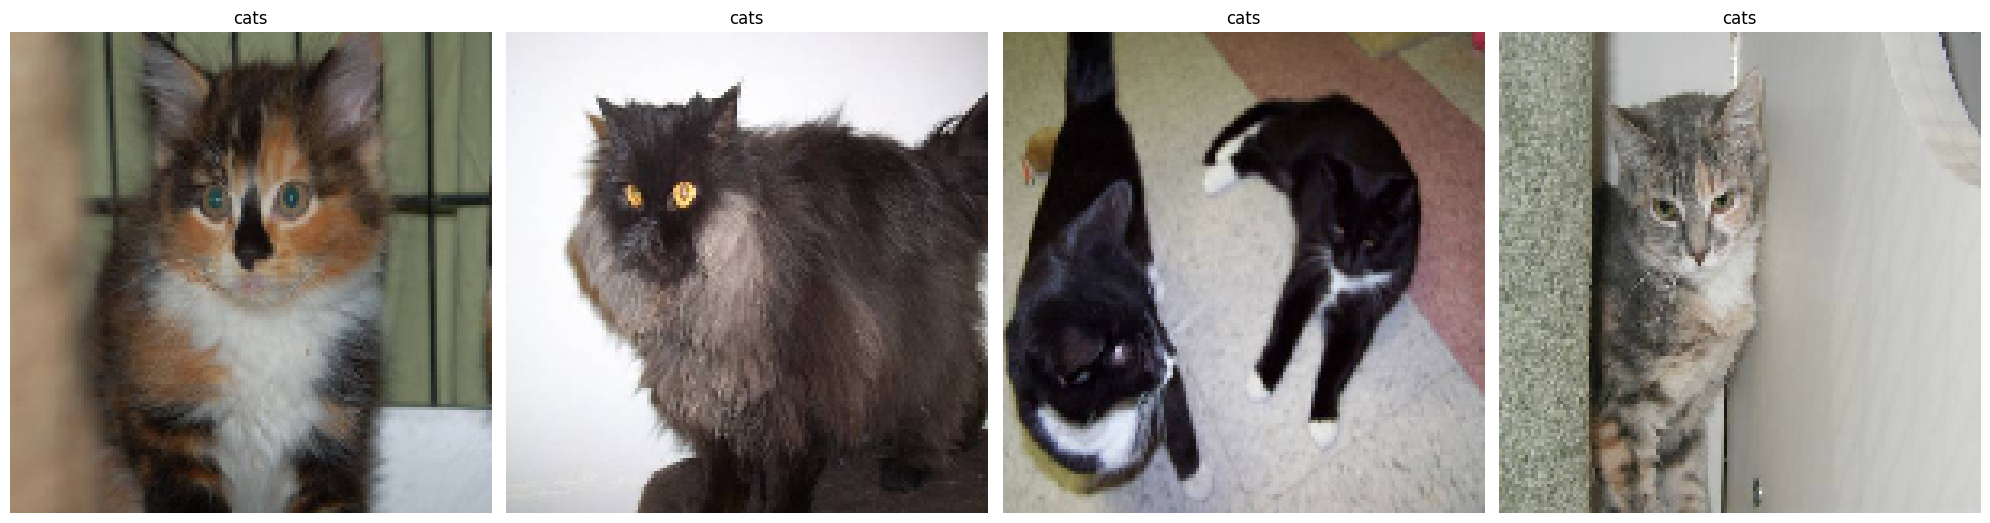

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
# resets the generator count as we executes it multiple times which increased the generator count
train_generator.reset()

# Basic CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

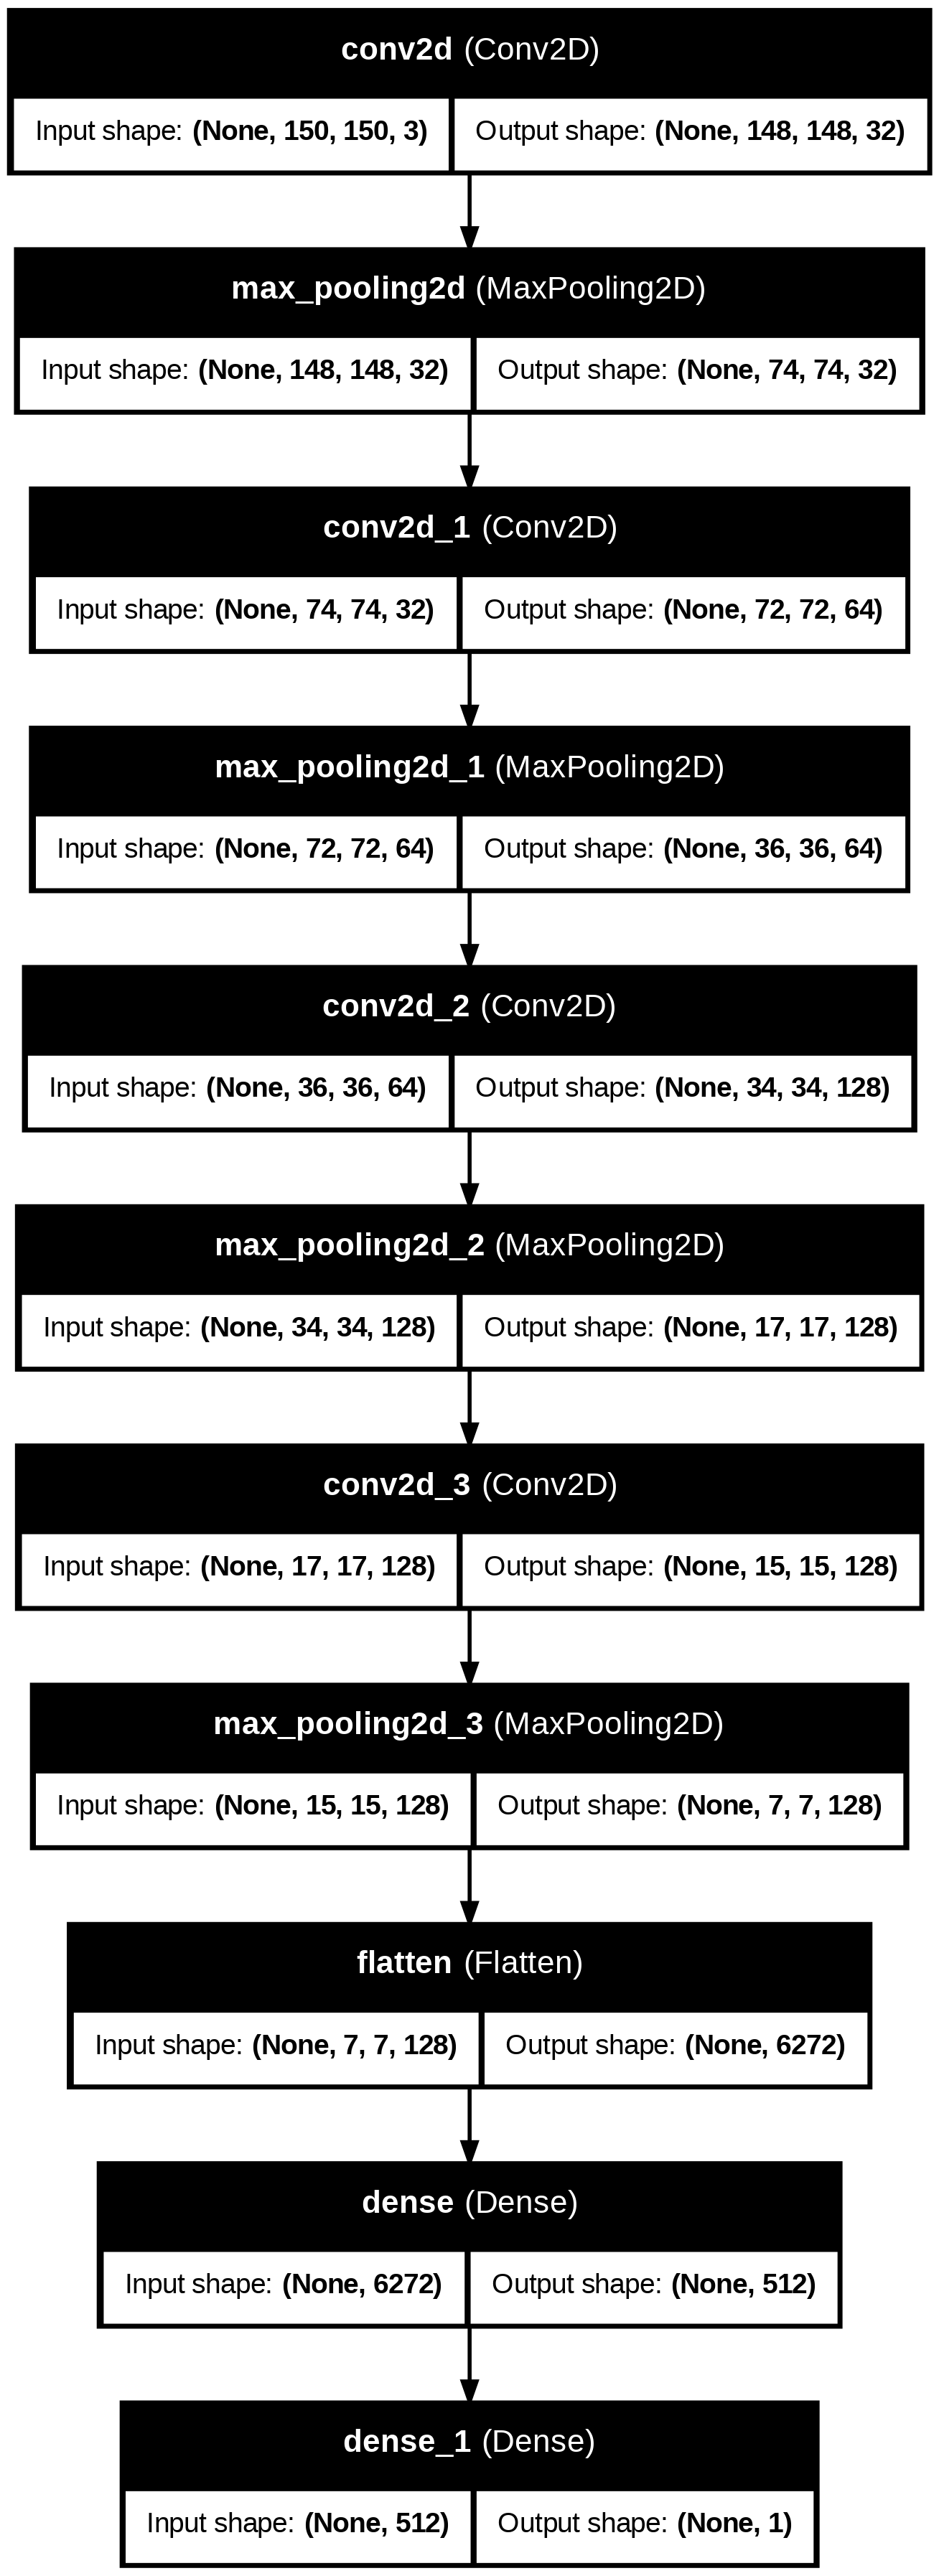

In [ ]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [ ]:
history = model.fit(
                    train_generator,
                    #steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    #validation_steps=200
                    )

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.5129 - loss: 0.6933 - val_accuracy: 0.5393 - val_loss: 0.6824
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5938 - loss: 0.6623 - val_accuracy: 0.6535 - val_loss: 0.6146
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.6747 - loss: 0.5902 - val_accuracy: 0.7450 - val_loss: 0.5170
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.7481 - loss: 0.5054 - val_accuracy: 0.7703 - val_loss: 0.4965
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.7982 - loss: 0.4406 - val_accuracy: 0.8188 - val_loss: 0.4056
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.8352 - loss: 0.3727 - val_accuracy: 0.8345 - val_loss: 0.3867
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8593 - loss: 0.3183 - val_accuracy: 0.8393 - val_loss: 0.3740
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.8816 - loss: 0.2703 - 

In [ ]:
history

In [ ]:
history.history

{'accuracy': [0.5145624876022339,
  0.6067500114440918,
  0.6991249918937683,
  0.7598749995231628,
  0.8021249771118164,
  0.8316875100135803,
  0.8623124957084656,
  0.8892499804496765,
  0.9148125052452087,
  0.9440000057220459],
 'loss': [0.693037748336792,
  0.6495941281318665,
  0.5669794678688049,
  0.49032509326934814,
  0.42951586842536926,
  0.37482330203056335,
  0.30955344438552856,
  0.25822797417640686,
  0.1985647827386856,
  0.1439175009727478],
 'val_accuracy': [0.5392500162124634,
  0.6535000205039978,
  0.7450000047683716,
  0.7702500224113464,
  0.8187500238418579,
  0.8345000147819519,
  0.8392500281333923,
  0.843999981880188,
  0.8512499928474426,
  0.8607500195503235],
 'val_loss': [0.6824063658714294,
  0.6146219968795776,
  0.516954243183136,
  0.4965232312679291,
  0.40561625361442566,
  0.38666102290153503,
  0.37399470806121826,
  0.3614554703235626,
  0.3506864607334137,
  0.41168609261512756]}

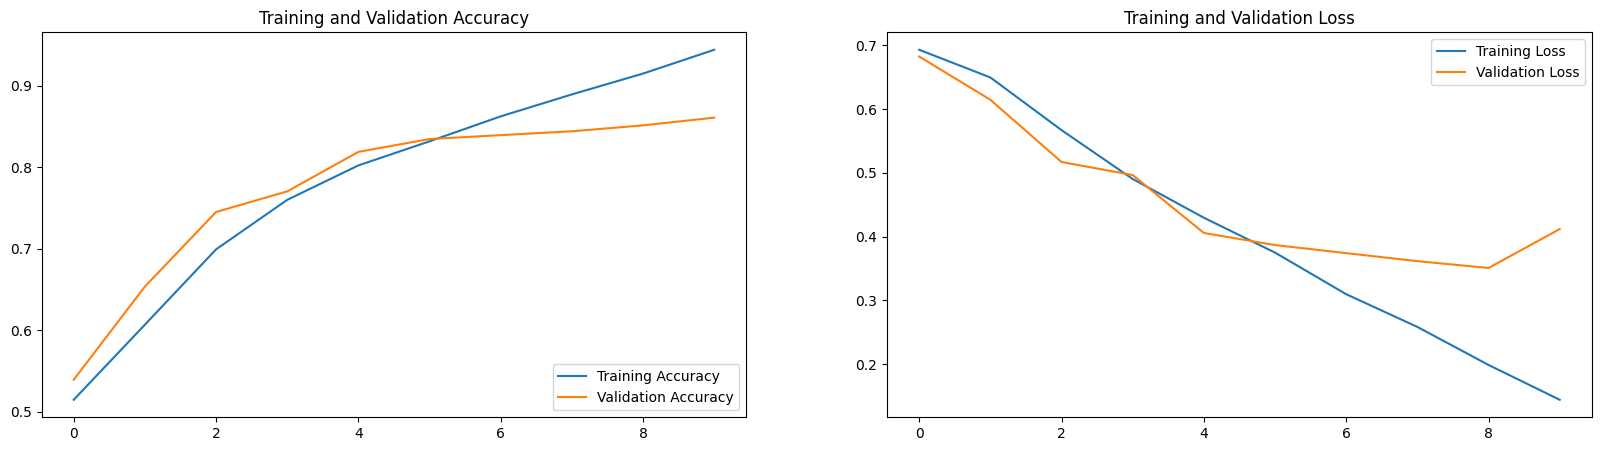

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation

## Inititating Test Generator

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


# Making Test Predictions

In [ ]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [ ]:
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))
probabilities

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step


array([[2.2102597e-05],
       [2.4959636e-05],
       [1.2453551e-04],
       ...,
       [9.9999642e-01],
       [7.8365970e-01],
       [4.1741520e-01]], dtype=float32)

In [ ]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step


array([0, 0, 0, ..., 1, 1, 0])

# Plotting Confusion Matrix

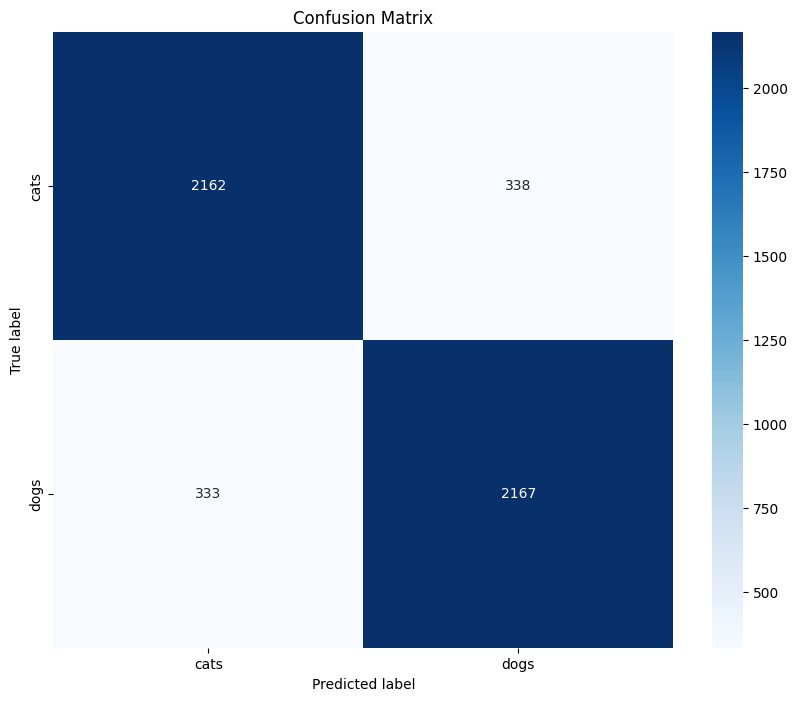

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Inference

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8628 - loss: 0.4066
Test accuracy: 86.58%
Test loss: 0.39


# Single Image Prediction

In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: [[0.99196327]]


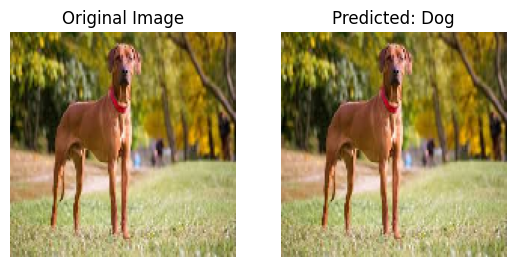

In [ ]:
# Load and preprocess the image
img_path = '/content/dog.jpeg'
make_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: [[3.626159e-05]]


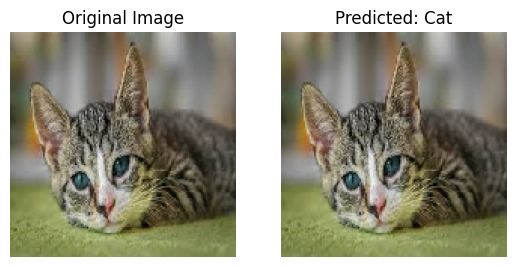

In [ ]:
# Load and preprocess the image
img_path = '/content/cat.jpeg'
make_prediction(img_path)

# Misclassifications

In [ ]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step
Total misclassifications in the test set: 671 out of 5000


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step
Total misclassifications: 671


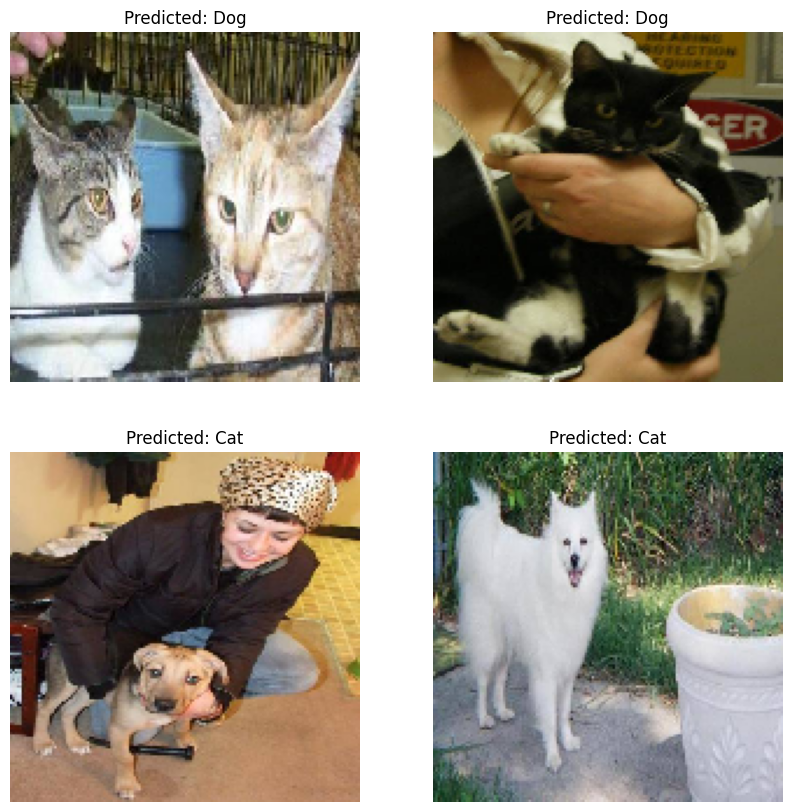

In [ ]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

# Visualising the kernel Feature Maps

In [ ]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)
layer number 6 conv2d_3 (3, 3, 128, 128)


In [ ]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [ ]:
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

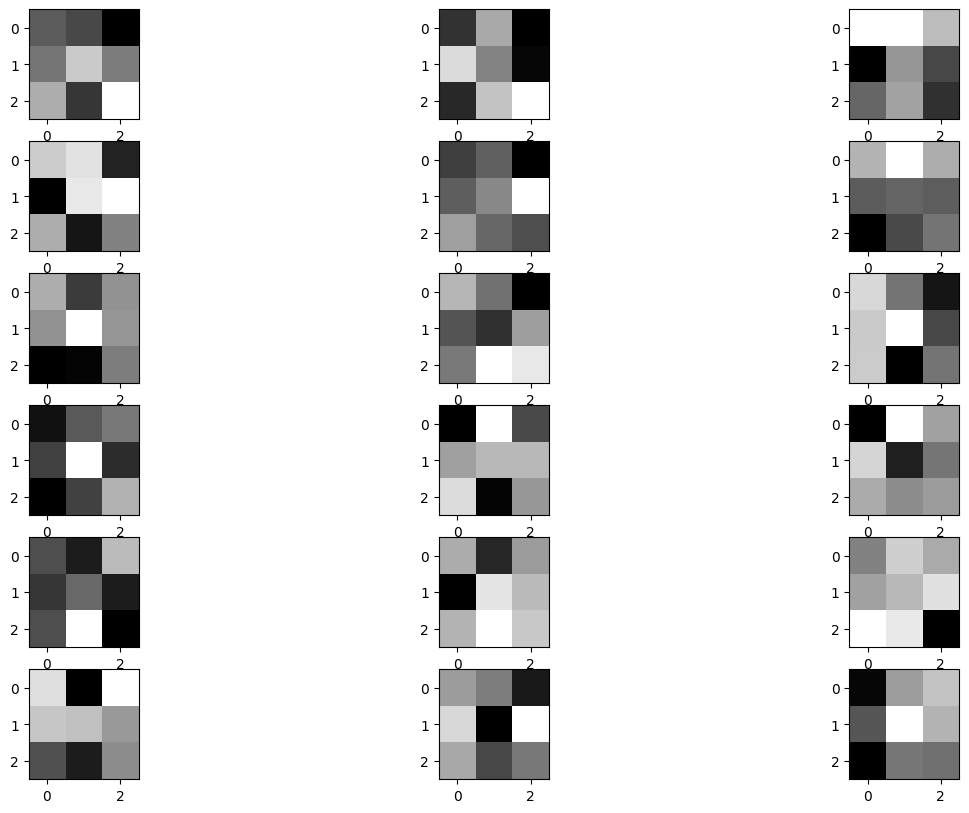

In [ ]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


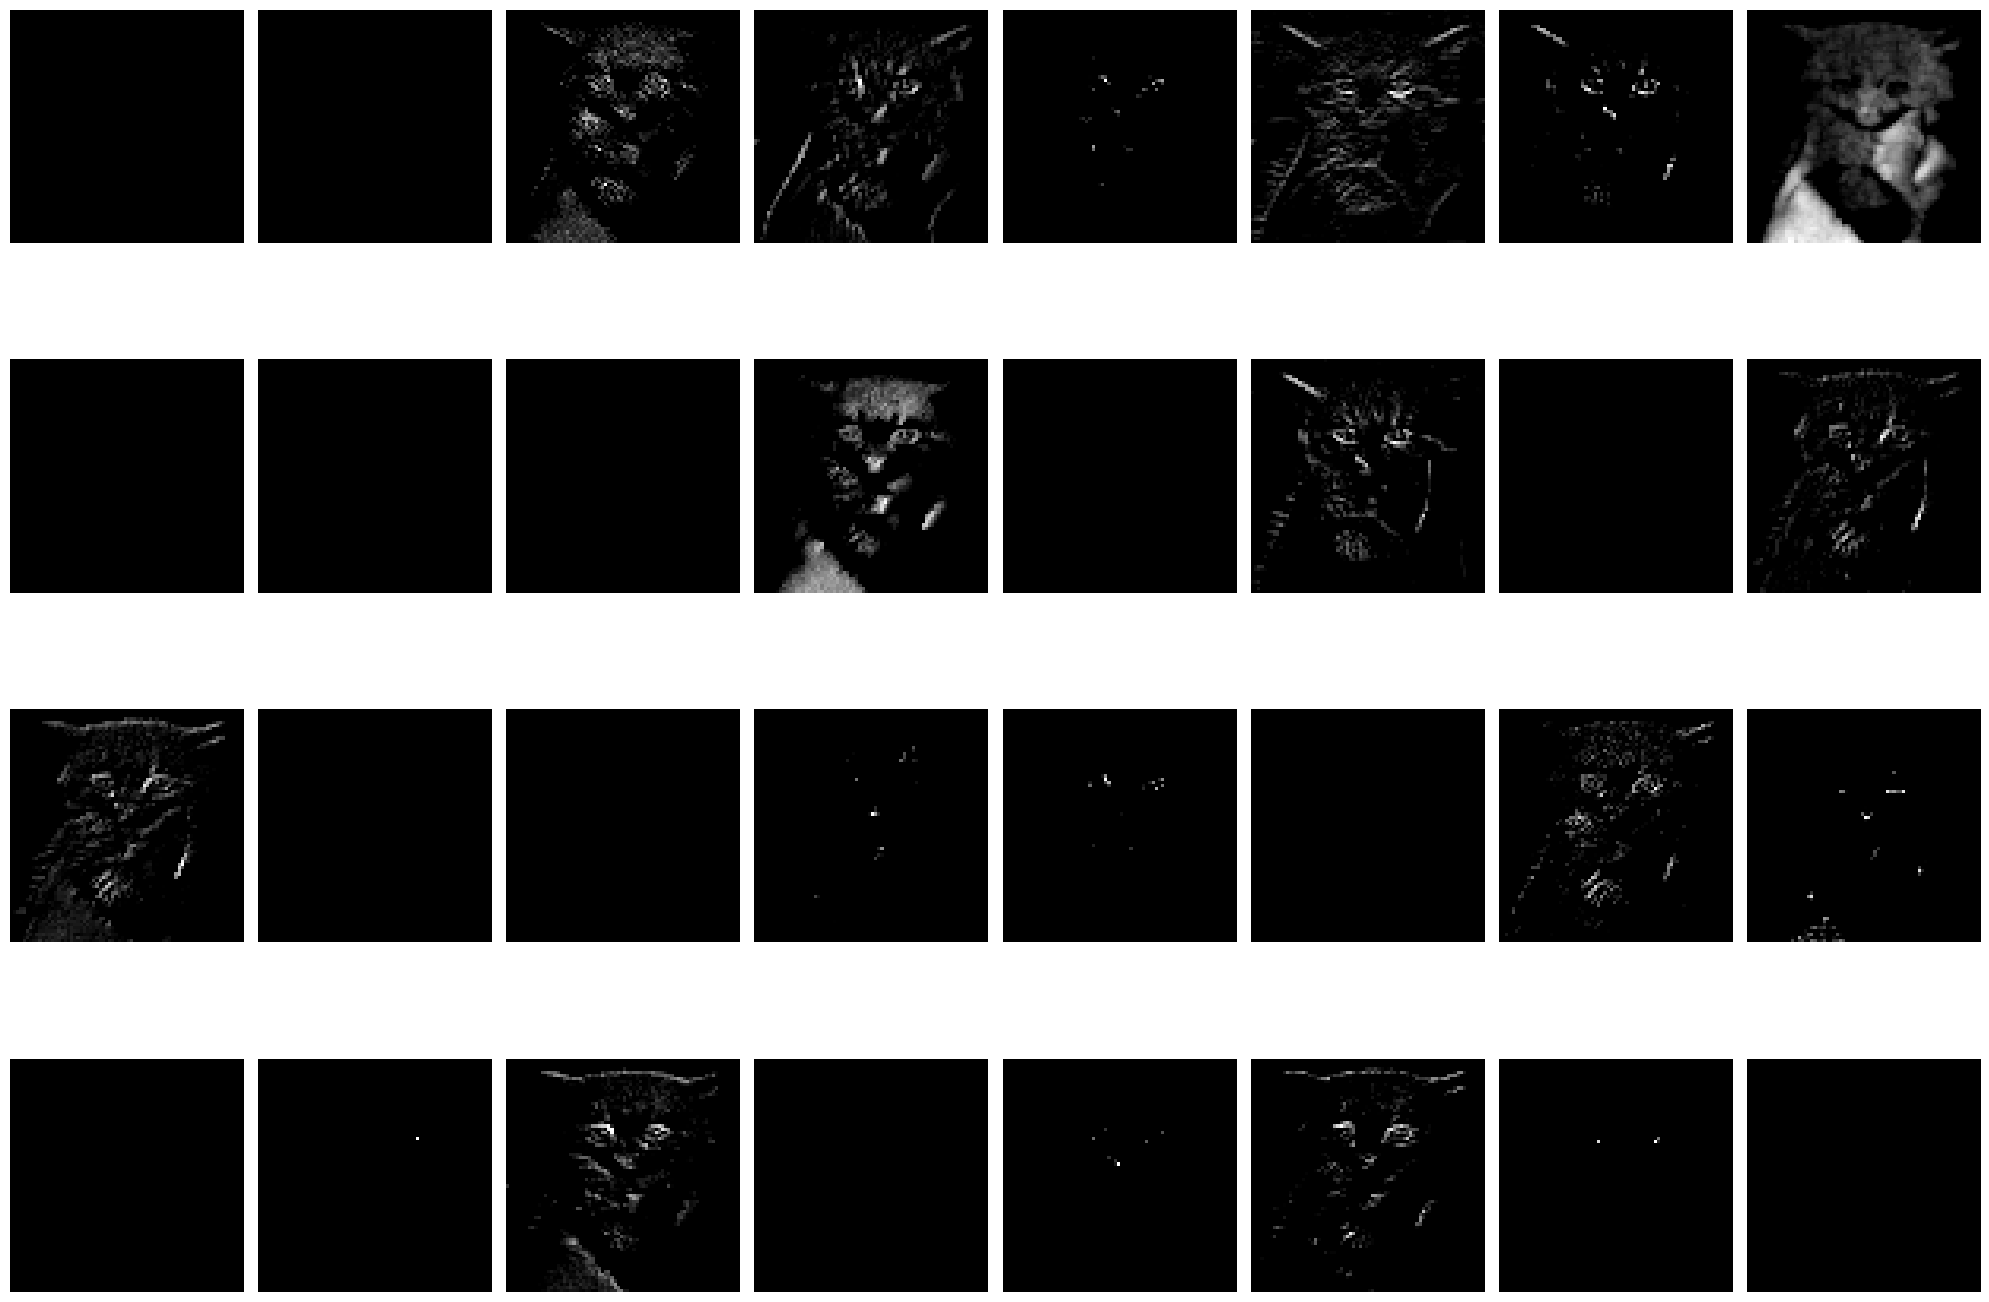

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()